# Code Documentation of ImageScraper

## Description of the Idea

The imagescraper I have created is to scrape images from the website https://www.500px.com/. This website is a platform for photographers to share their work with other photographers. On this webpage you can find a lot of high quality images in differnt image classes provided by each photographers. As I am a user and member of this website too and share images as well from time to time, I wanted to create a scraper to scrape images with their respective classes from the website. Furthermore the idea behind the scraping and their image classes is to create an image classification model for photography, which could potentially used for different websites to classify the uploaded images.

## Getting Started:

First of all you have to install a webdriver, which is compatible with selenium. You can check this on the repective webpage of selenium: https://www.selenium.dev/downloads/

For example you can get the webdriver for Chrome here: https://chromedriver.chromium.org/downloads 

This part describes in which ways the imagescraper can be used to achieve your scraping goals. There are actually two different ways to scrape from the webpage:

1. Call the ImageCrawler500 class and its crawl method to scrape a certain amount of different picture from each image class.
2. It is possible to do an image streaming, which one could also call a mirror, if you put in a close density of stream times as class attribute.

### Method 1: ImageCrawler500

Crawl images from the website with a fixed amount of images per class. It is possible to make use of the script `crawler_exe.py`. Parameters with this script need to be adjusted as well before the script is started.

#### Usage Procedure with class import:
- Initiate class with the relevant paramters:
    - path to your selenium webdriver. My Webdrier was chromedriver given in the path.
    - Then chose the amount of images you want from each class.
    - then choose popularity ranking, which are listed on the website.
- call method crawl() to start the process.
- After all image sources where extracted the picture will be stored in the folder structure with the respective image class.

In [3]:
# Import class ImageCrawler500
from imagescraper500 import ImageCrawler500
from selenium import webdriver

In [4]:
# Initiate class
crawler = ImageCrawler500(webdriver=webdriver.Chrome('./src/chromedriver.exe'),
                          amount_per_class=2, 
                          popularity_ranking='popular')

In [5]:
# Start process
crawler.crawl()

| Extracting: 2 Images of fine art (1/28)
| Extracting: 2 Images of still life (2/28)
| Extracting: 2 Images of journalism (3/28)
| Extracting: 2 Images of people (4/28)
| Extracting: 2 Images of wedding (5/28)
| Extracting: 2 Images of concert (6/28)
| Extracting: 2 Images of travel (7/28)
| Extracting: 2 Images of food (8/28)
| Extracting: 2 Images of abstract (9/28)
| Extracting: 2 Images of macro (10/28)
| Extracting: 2 Images of sport (11/28)
| Extracting: 2 Images of aerial (12/28)
| Extracting: 2 Images of commercial (13/28)
| Extracting: 2 Images of celebrities (14/28)
| Extracting: 2 Images of underwater (15/28)
| Extracting: 2 Images of night (16/28)
| Extracting: 2 Images of street (17/28)
| Extracting: 2 Images of performing arts (18/28)
| Extracting: 2 Images of landscapes (19/28)
| Extracting: 2 Images of animals (20/28)
| Extracting: 2 Images of family (21/28)
| Extracting: 2 Images of film (22/28)
| Extracting: 2 Images of city and architecture (23/28)
| Extracting: 2 I

100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [00:09<00:00,  3.05it/s]


In [6]:
img_count_in_folder = crawler.count_collected_images(print_count=True)

Counted 425 Collected Images.


### Method 2: ImageStream500

The second method is to make an image stream of a particular image class. The stream makes it possible to get all new images within a class or to scrape an amount of images at a defined time. Therefore two scripts were created in the folder run. `stream_exe.py`, `stream_exe_no_scheduler.py`

`stream_exe.py` is meant to run with the program scheduler used in windows for example. The other script runs by itself at the times defined within the script.

#### Usage Procedure with class import:
- Initiate class with the relevant paramters:
    - Initiate a selenium webdriver object
    - Then chose the amount of images you want from each class.
    - then choose popularity ranking, which are listed on the website.
- call method stream() to start the process.
- After all image sources where extracted the picture will be stored in the folder structure with the respective image class.

In [7]:
from imagescraper500 import ImageStream500
from selenium import webdriver

In [8]:
streamer = ImageStream500(webdriver=webdriver.Chrome('./src/chromedriver.exe'), 
                          popularity='fresh', iter_sampling_rate=10, batchsize=15, 
                          stream_time=2, image_folder_path='./images'
                         )

In [9]:
streamer.stream()

| Extracted 6 images in total.
| Extracted 12 images in total.
| Extracted 17 images in total.
| Starting download of all images ...


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:08<00:00,  1.17it/s]


| Saved Image Batch to folder.
| Extracted 5 images in total.
| Extracted 12 images in total.
| Extracted 17 images in total.
| Starting download of all images ...


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:08<00:00,  1.18it/s]


| Saved Image Batch to folder.
| Extracted 9 images in total.
| Extracted 10 images in total.
| Starting download of all images ...


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.12it/s]

| Saved Last Image Batch to folder.
| Stream Time of 5 min over.


In [10]:
img_count_in_folder = crawler.count_collected_images(print_count=True)

Counted 469 Collected Images.


## Preview some Downlaoded Images

In [15]:
from PIL import Image
import matplotlib.pyplot as plt
import os
import random

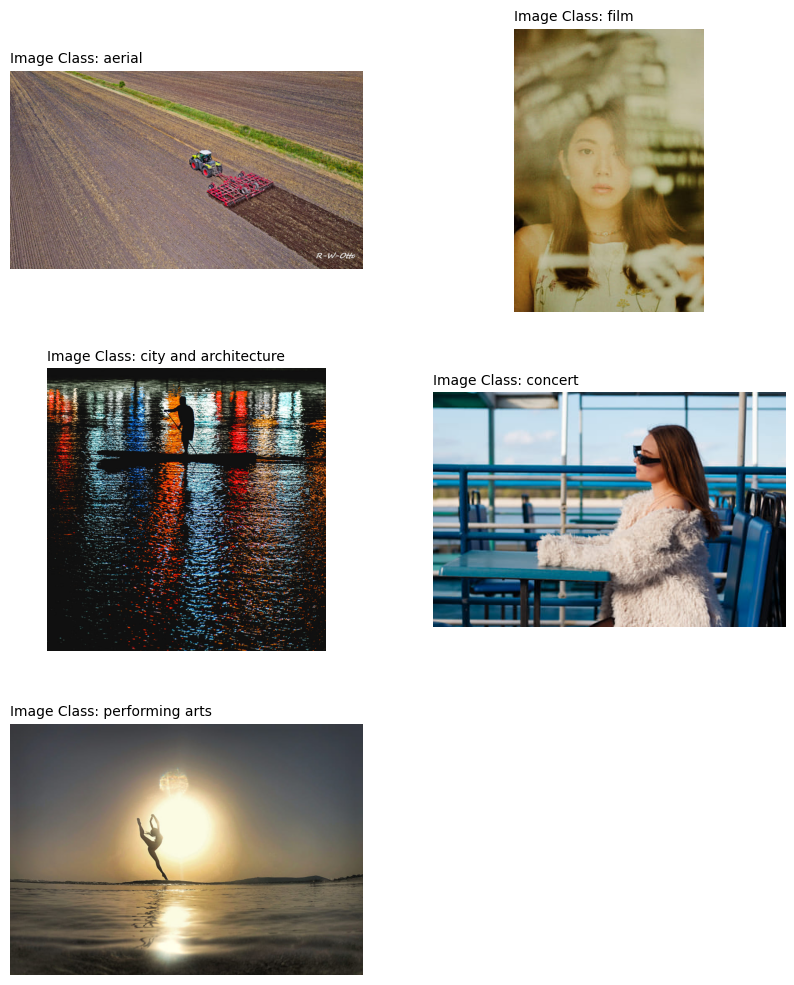

In [52]:
def show_random_images(count=10):
    fig = plt.subplots(figsize=(10, count/2*5))
    ncols, nrows = 2, int(count/2)+1
    
    for i in range(1, count+1):
        plt.subplot(nrows, ncols, i)
        image_dirs = os.listdir('./images')
        random_dir = random.choice(image_dirs)
        images = os.listdir(f'./images/{random_dir}')
        random_image = random.choice(images)

        img = Image.open(f'./images/{random_dir}/{random_image}')
        plt.title(f'Image Class: {random_dir}', loc='left', fontsize=10)
        plt.axis('off')
        plt.imshow(img)
        
    plt.show()

show_random_images(count=5)

## Relevance

I think this project I can use this scraper for the module Deep Learning (dpl), in which I probably need a lot of higher quality image, which this website is dedicated for.